# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
!pip install joblib

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [18]:
# Check the total number of rows & columns
df.shape

(158, 11)

In [16]:
# print the first 15 rows of "happiness_score_dataset"
df.head(15)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [17]:
# find the least countries
df.tail(15)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [7]:
# find if there any null values 
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
# find the unique country names 
df.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [9]:
# find the unique Region names 
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [10]:
# Describing the dataframe 
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:

df.drop('Happiness Rank',axis=1,inplace=True)

In [13]:
# Check the data-type and info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 13.7+ KB


In [19]:
# Let's check the correlation between variables
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Visualization

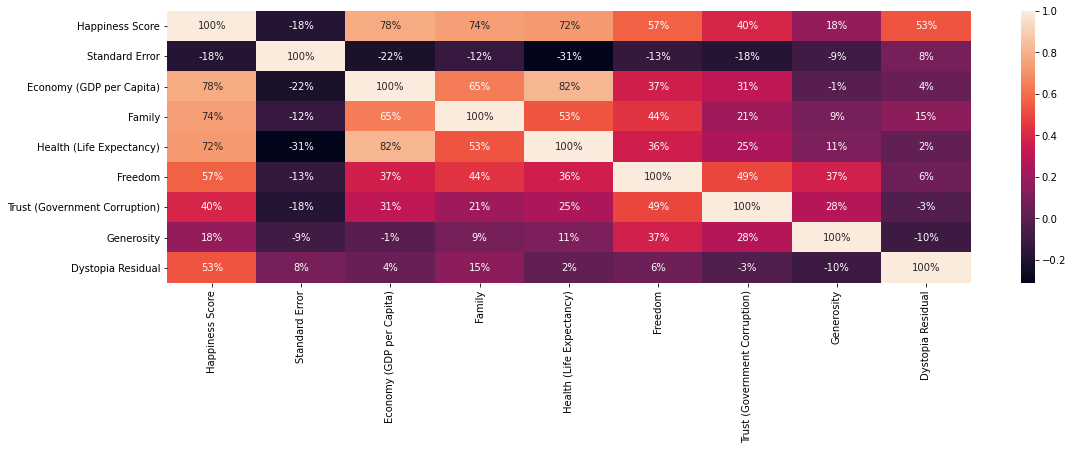

In [33]:
#correlation between happiness score and happniess rank is higly negative so we need to drop the happiness rank
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

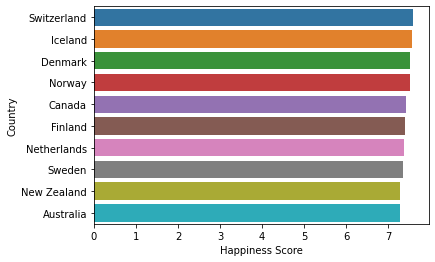

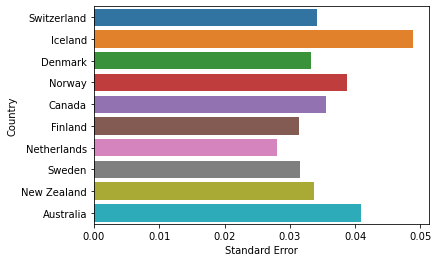

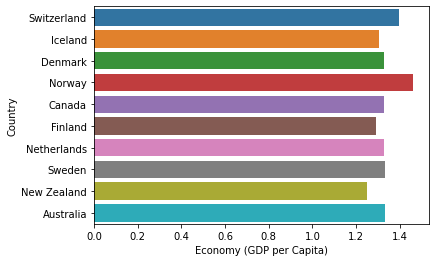

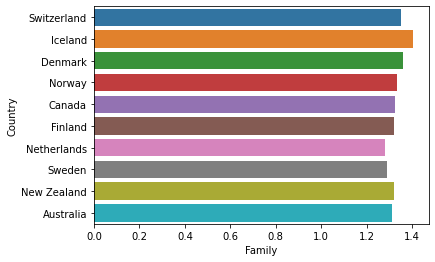

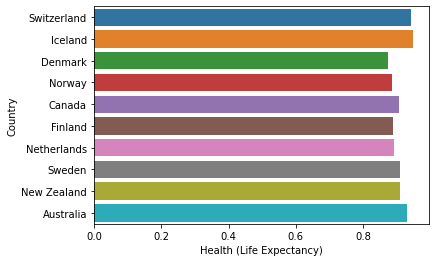

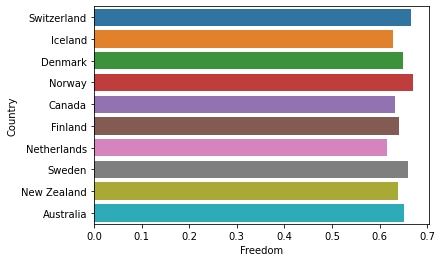

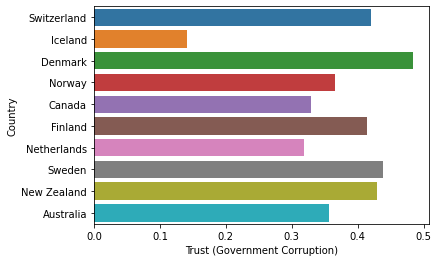

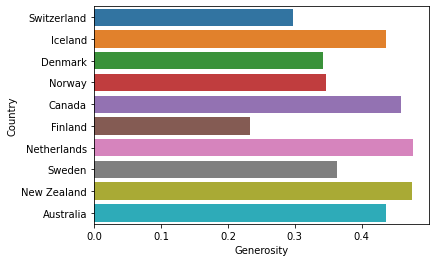

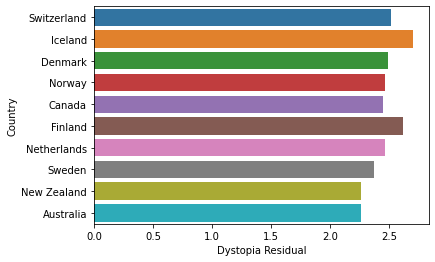

In [37]:
#checking the top 10 country which column has major impact in happiness score
for col in df.select_dtypes(include=["float64"]):
    sns.barplot(y=df["Country"][0:10],x=df[col])
    plt.show()

Happiness Score                     AxesSubplot(0.125,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Family                           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Health (Life Expectancy)            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Trust (Government Corruption)    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Generosity                       AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Dystopia Residual                      AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

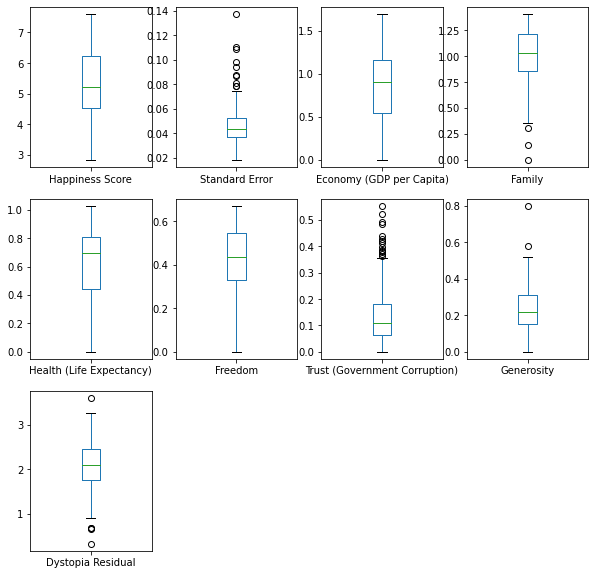

In [39]:
#drawing boxplot just to get the idea of outliers and it shows there are some outliers.so we will remove it through z score
df.plot(kind="box",subplots=True,layout=(3,4),figsize=(10,10))

In [42]:
#dropping the columns which has no relation with the target or which has no effect on target by removing them
df.drop(columns=["Country","Region"],inplace=True)

In [44]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:>

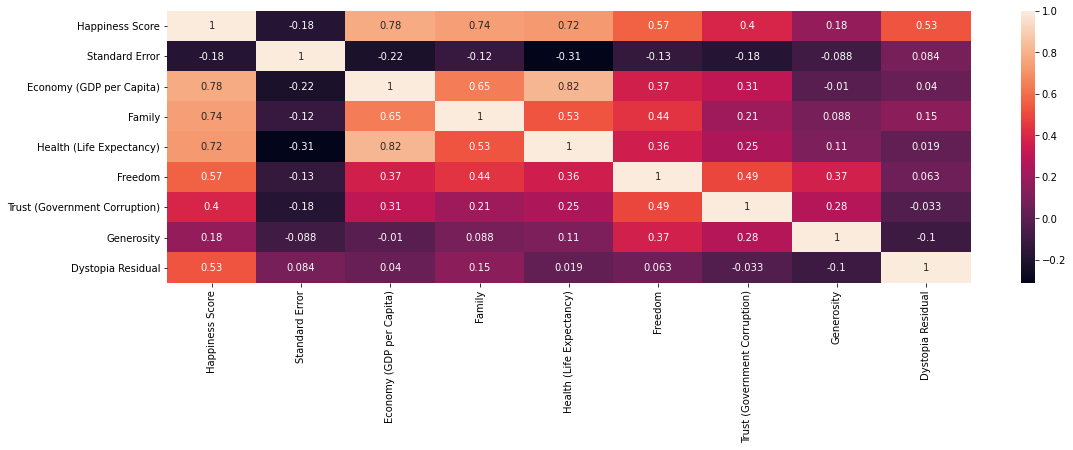

In [48]:
#after removing some columns just checking the correlation which tells that all are necessary fields
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)

In [50]:
#Removing the outlier using zscore
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
happy=df[(z_score<3).all(axis=1)]
print(happy.shape)

(158, 9)
(149, 9)


In [51]:
happy.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [52]:
#splitting the data into x(independent variable) and y(target variable)
x=happy.drop("Happiness Score",axis=1)
y=happy["Happiness Score"]

In [53]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [54]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# standard scaler

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scale=StandardScaler()

In [57]:
x=scale.fit_transform(x)

In [58]:
x.shape

(149, 8)

# Regression Process and Training the model

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [62]:
def max_r2_score(rgr,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        rgr.fit(x_train,y_train)
        pred=rgr.predict(x_test)
        r_sc=r2_score(y_test,pred)
        if r_sc>max_score:
            max_score=r_sc
            r_state=r
            
    print('max score at random_state of',r_state,'is',max_score)
    return r_state

In [63]:
lr=LinearRegression()

In [64]:
sc=max_r2_score(lr,x,y)

max score at random_state of 72 is 0.9999999572857349


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=68)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [66]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.9999999386809023


RMSE 0.00028599240563312236


# Lasso Regression

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [69]:
lsr=Lasso()
pr={'alpha':[.001,.01,.1,1]}
gs=GridSearchCV(lsr,pr,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [70]:
lsr=Lasso(alpha=.001)
sc=max_r2_score(lsr,x,y)

max score at random_state of 88 is 0.9999980178808237


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=68)
lsr.fit(x_train,y_train)
pred=lsr.predict(x_test)

In [73]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.9999970915109232


RMSE 0.001969655811120799


# KNeighborsRegressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn=KNeighborsRegressor()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 14}

In [76]:
knn=KNeighborsRegressor(n_neighbors=7)
sc=max_r2_score(knn,x,y)

max score at random_state of 89 is 0.9706488816526765


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=65)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [78]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.941563486843765


RMSE 0.26494468040228586


# GradientBoostingRegressor¶

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
gb=GradientBoostingRegressor()
pr={'learning_rate':[.001,.01,.1,1],'n_estimators':[10,100,500,1000]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [81]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
sc=max_r2_score(gb,x,y)

max score at random_state of 73 is 0.9731744899488224


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=93)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [84]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.9714946014533705


RMSE 0.18870527805081638


# AdaBoostRegressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [86]:
ad=AdaBoostRegressor()
pr={'n_estimators':[10,100,500,1000],'learning_rate':[.001,.01,.1,1],'base_estimator':[lr,lsr,DecisionTreeRegressor()]}
gs=GridSearchCV(ad,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LinearRegression(),
 'learning_rate': 0.1,
 'n_estimators': 1000}

In [87]:
ad=AdaBoostRegressor(base_estimator=lr,learning_rate=1,n_estimators=500)
sc=max_r2_score(ad,x,y)

max score at random_state of 72 is 0.9999999533743831


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=68)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)

In [89]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.9999999407184677


RMSE 0.0002812006585868515


# Crossvalidation

In [90]:
cross_val_score(lr,x,y,cv=5).mean()

0.9999981234686345

In [91]:
cross_val_score(lsr,x,y,cv=5).mean()

0.999782884529373

In [92]:
cross_val_score(knn,x,y,cv=5).mean()

-4.871669946351972

In [93]:
cross_val_score(gb,x,y,cv=5).mean()

-2.252960554577934

In [94]:
cross_val_score(ad,x,y,cv=5).mean()

0.9999981303959229

in the process of cross validation we find that adaboostregressor is having highest score so we select the adaboostregressor for the model



# saving the model¶


In [99]:
import joblib

In [101]:
joblib.dump(df,"df.happiness_score.pkl")

['df.happiness_score.pkl']